Using example from:
http://wilkox.org/treemapify/

In [8]:
library(ggplot2)
library(treemapify)
library(dplyr)
library(rWCVP)
library(galah)
library(sf)

Linking to GEOS 3.11.0, GDAL 3.5.3, PROJ 9.1.0; sf_use_s2() is TRUE



In [2]:
galah_config(email = readLines("../secrets/galah-email.txt"))

Set working directory

In [3]:
here::i_am("figures-from-tables/fire-history-figure.ipynb")

here() starts at /Users/z3529065/proyectos/fireveg/fireveg-analysis



In [4]:
st_table <- readRDS(here::here("data","Summary-traits-species.rds"))

In [5]:
str(st_table)

'data.frame':	15732 obs. of  18 variables:
 $ family  : chr  "Brassicaceae" "Myrtaceae" "Myrtaceae" "Apiaceae" ...
 $ genus   : chr  "Lepidium" "Eucalyptus" "Melaleuca" "Actinotus" ...
 $ spp     : num  2358 2359 2360 2361 2362 ...
 $ species : chr  "Lepidium oxytrichum" "Eucalyptus williamsiana" "Melaleuca glomerata" "Actinotus helianthi" ...
 $ nquadrat: num  0 0 0 0 0 2 1 0 0 0 ...
 $ germ8   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ rect2   : num  0 1 0 2 0 0 0 0 0 0 ...
 $ germ1   : num  0 1 0 1 0 0 0 0 0 1 ...
 $ grow1   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ repr4   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ surv5   : num  0 0 0 2 0 0 0 0 0 0 ...
 $ surv6   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ surv7   : num  0 0 0 1 0 0 0 0 0 0 ...
 $ disp1   : num  3 0 0 3 1 1 0 1 0 1 ...
 $ repr3a  : num  0 0 0 0 0 0 1 0 0 0 ...
 $ repr3   : num  0 0 0 3 0 0 0 0 0 0 ...
 $ surv4   : num  0 0 0 0 0 0 1 0 0 0 ...
 $ surv1   : num  1 6 3 14 1 1 3 1 0 7 ...


In [6]:
fams <- unique(st_table$family)
length(fams)

[1] 368

In [9]:
nsw <- st_transform(ozmaps::ozmap_states, 4326) %>% filter(NAME == "New South Wales")

In [10]:
plant_families <- galah_call() |>
  galah_identify("plantae") |>
galah_geolocate(nsw, type = "bbox")|>
  galah_down_to(family) |>
  atlas_taxonomy()

Data returned for bounding box:
xmin = 140.99927 xmax = 153.62986 ymin = -37.50503 ymax = -28.15703


In [12]:

library(data.tree)
print(plant_families, pruneMethod = "dist", limit = 10)

                           levelName
1  Plantae                          
2   ¦--Rhodoplantae                 
3   ¦   °--Glaucophyta              
4   ¦       °--... 1 nodes w/ 2 sub 
5   ¦--Anthocerotophyta             
6   ¦   °--Anthocerotopsida         
7   ¦       °--... 3 nodes w/ 6 sub 
8   ¦--Bryophyta                    
9   ¦   °--... 4 nodes w/ 128 sub   
10  ¦--Charophyta                   
11  ¦   °--... 2 nodes w/ 459 sub   
12  ¦--Marchantiophyta              
13  ¦   ¦--Jungermanniopsida        
14  ¦   ¦   °--... 3 nodes w/ 76 sub
15  ¦   °--... 2 nodes w/ 104 sub   
16  °--Tracheophyta                 
17      °--... 1 nodes w/ 26 sub    


In [14]:
df_rank <- ToDataFrameTypeCol(plant_families, type = "rank")
df_rank[10:20,] |> tibble::as_tibble() |> print(max_footer_lines = 2)

# A tibble: 11 × 10
   rank_kingdom rank_subkingdom rank_phylum rank_class rank_order  rank_subclass
   <chr>        <chr>           <chr>       <chr>      <chr>       <chr>        
 1 Plantae      NA              Bryophyta   Bryopsida  Bryales     Bryidae      
 2 Plantae      NA              Bryophyta   Bryopsida  Hedwigiales Bryidae      
 3 Plantae      NA              Bryophyta   Bryopsida  Hedwigiales Bryidae      
 4 Plantae      NA              Bryophyta   Bryopsida  Hookeriales Bryidae      
 5 Plantae      NA              Bryophyta   Bryopsida  Hookeriales Bryidae      
 6 Plantae      NA              Bryophyta   Bryopsida  Hookeriales Bryidae      
 7 Plantae      NA              Bryophyta   Bryopsida  Hookeriales Bryidae      
 8 Plantae      NA              Bryophyta   Bryopsida  Hookeriales Bryidae      
 9 Plantae      NA              Bryophyta   Bryopsida  Hypnales    Bryidae      
10 Plantae      NA              Bryophyta   Bryopsida  Hypnales    Bryidae      
11 Plant

In [17]:
st_table$rank_order <- df_rank$rank_order[match(st_table$family,df_rank$rank_family)]

In [20]:
st_table %>% slice(1:5)

family,genus,spp,species,nquadrat,germ8,rect2,germ1,grow1,repr4,surv5,surv6,surv7,disp1,repr3a,repr3,surv4,surv1,rank_order
<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
Brassicaceae,Lepidium,2358,Lepidium oxytrichum,0,0,0,0,0,0,0,0,0,3,0,0,0,1,Brassicales
Myrtaceae,Eucalyptus,2359,Eucalyptus williamsiana,0,0,1,1,0,0,0,0,0,0,0,0,0,6,Myrtales
Myrtaceae,Melaleuca,2360,Melaleuca glomerata,0,0,0,0,0,0,0,0,0,0,0,0,0,3,Myrtales
Apiaceae,Actinotus,2361,Actinotus helianthi,0,0,2,1,0,1,2,0,1,3,0,3,0,14,Apiales
Apiaceae,Apium,2362,Apium prostratum,0,0,0,0,0,0,0,0,0,1,0,0,0,1,Apiales


In [7]:
matched_table <- wcvp_match_names(head(st_table), name_col="species")



── Matching names to WCVP ──────────────────────────────────────────────────────

ℹ Using the `species` column

! No author information supplied - matching on taxon name only



── Exact matching  names ──



✔ Found 6 of  names



── Matching complete! ──



✔ Matched 6 of 6 names

ℹ Exact (without author): 6

! Names with multiple matches: 0



In [9]:
str(matched_table)

'data.frame':	6 obs. of  30 variables:
 $ family             : chr  "Brassicaceae" "Myrtaceae" "Myrtaceae" "Apiaceae" ...
 $ genus              : chr  "Lepidium" "Eucalyptus" "Melaleuca" "Actinotus" ...
 $ spp                : num  2358 2359 2360 2361 2362 ...
 $ species            : chr  "Lepidium oxytrichum" "Eucalyptus williamsiana" "Melaleuca glomerata" "Actinotus helianthi" ...
 $ nquadrat           : num  0 0 0 0 0 2
 $ germ8              : num  0 0 0 0 0 0
 $ rect2              : num  0 1 0 2 0 0
 $ germ1              : num  0 1 0 1 0 0
 $ grow1              : num  0 0 0 0 0 0
 $ repr4              : num  0 0 0 1 0 0
 $ surv5              : num  0 0 0 2 0 0
 $ surv6              : num  0 0 0 0 0 0
 $ surv7              : num  0 0 0 1 0 0
 $ disp1              : num  3 0 0 3 1 1
 $ repr3a             : num  0 0 0 0 0 0
 $ repr3              : num  0 0 0 3 0 0
 $ surv4              : num  0 0 0 0 0 0
 $ surv1              : num  1 6 3 14 1 1
 $ match_type         : chr  "Exact (wi

In [23]:
gt_table <- st_table %>% 
    filter(!is.na(rank_order)) %>%
    slice_sample(n=5000) %>%
    mutate(fielddata=nquadrat>0,
          litdata=germ8+rect2+grow1>0,
          kldg=case_when(
              fielddata & litdata ~ "both",
              fielddata ~ "fieldata",
              litdata ~ "litdata",
              TRUE ~ "none"
          )
          )
clrs <- c(none="aliceblue", fieldata="yellow", litdata="orange", both="maroon")

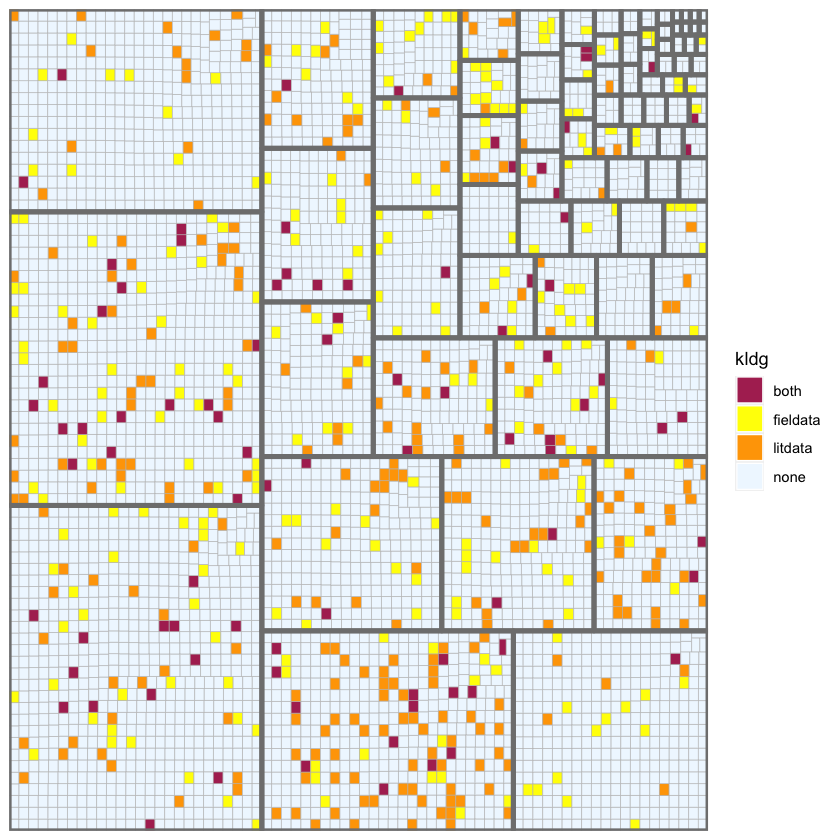

In [24]:
ggplot(gt_table, aes(area=1, fill = kldg, label = genus,
                subgroup = rank_order)) +
  geom_treemap() +
  geom_treemap_subgroup_border() +
  scale_fill_manual(values=clrs)

In [26]:
 st_table %>% 
    filter(is.na(rank_order)) %>% 
    group_by(family) %>%
summarise(n=n_distinct(genus))

family,n
<chr>,<int>
Agavaceae,4
Anthericaceae,11
Athyriaceae,4
Aucubaceae,1
Azollaceae,1
Bangiaceae,1
Batrachospermaceae,1
Bombacaceae,1
Boraginaceae,19
